This project aims to extract features from raw audio

    The Sound:

In [1]:
import IPython
IPython.display.Audio("inputs/sounds/3129775.wav")

    Phase 1: Training...

In [ ]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *
import IPython

loader = SoundLoader(sound="inputs/sounds/3129775.wav",
                     fixed_size=16*16, 
                     sample_size=0.7, 
                     insert_global_input_state = 4,
                     one_hot = 256,
                     uLaw = 256,
                     samplerate=441,
                     amplitude = 0.5,
                     label_offset=0, 
                     #random = False
                     )

print(loader.fixed_size)

network = ConvNet(loader, 
                  training_iters=1000000, 
                  display_step=10, 
                  save_step = 30000,
                  learning_rate = 0.1, 
                  decay_step = 10000,
                  decay_rate = 0.95,
                  batch_size=128,
                  n_steps = 16,
                 )

print(network.n_input)
print(network.n_classes)

x=tf.placeholder(tf.float32, [None, 16+loader.insert_global_input_state, 16], "X")
#x=tf.placeholder("float", [None, 8*8])

layers = []
"""
layers.append(NNOperation("reshape", [-1, 32+loader.insert_global_input_state, 32, 1]))
layers.append(NNOperation("conv2d", [2, 2, 1, 32]))
layers.append(NNOperation("reshape", [-1, (32+loader.insert_global_input_state)*32, 32]))
"""
layers.append(GRUOperation(cells=[1024], n_classes=network.n_classes))

network.Run(layers, x=x, save_path="graphs/AudioGenerationGraph")


257
16
256
x: (?, 20, 16)
y: (?, 256)
GRU_0: [1024] => (?, 256)


C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Iter 1280, Minibatch Loss= 137.882309, Training Accuracy= 0.04688, Learning Rate= 0.1
Iter 2560, Minibatch Loss= 166.533447, Training Accuracy= 0.02344, Learning Rate= 0.1
Iter 3840, Minibatch Loss= 128.672394, Training Accuracy= 0.00781, Learning Rate= 0.1
Iter 5120, Minibatch Loss= 110.861481, Training Accuracy= 0.00000, Learning Rate= 0.1
Iter 6400, Minibatch Loss= 74.086464, Training Accuracy= 0.01562, Learning Rate= 0.1
Iter 7680, Minibatch Loss= 72.379379, Training Accuracy= 0.01562, Learning Rate= 0.1
Iter 8960, Minibatch Loss= 62.159290, Training Accuracy= 0.02344, Learning Rate= 0.1
Iter 10240, Minibatch Loss= 59.683739, Training Accuracy= 0.05469, Learning Rate= 0.095
Iter 11520, Minibatch Loss= 66.315796, Training Accuracy= 0.00781, Learning Rate= 0.095
Iter 12800, Minibatch Loss= 54.196243, Training Accuracy= 0.00781, Learning Rate= 0.095
Iter 14080, Minibatch Loss= 56.062164, Training Accuracy= 0.04688, Learning Rate= 0.095
Iter 15360, Minibatch Loss= 67.399651, Training A

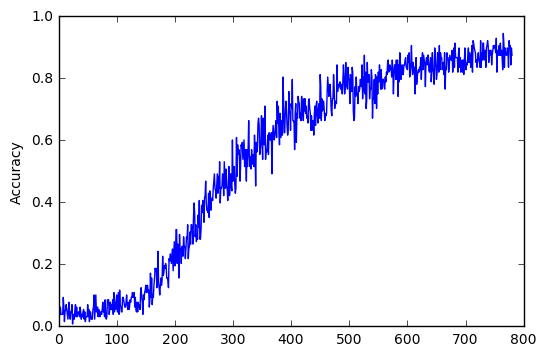

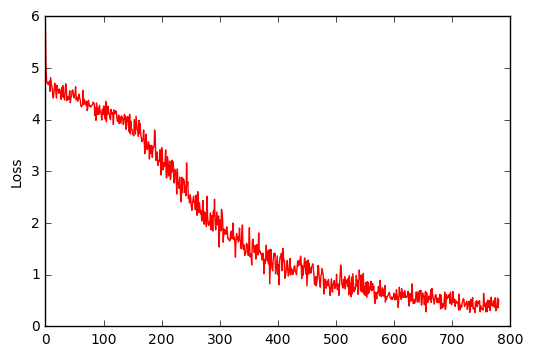

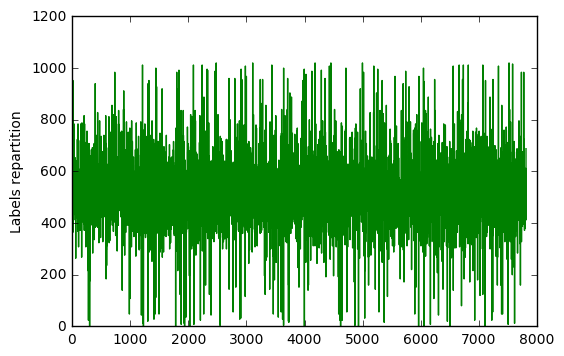

999936


In [4]:
network.Plot()
print(len(loader.extract_log))


    Phase 2: Generation

In [1]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *

loader = SoundLoader(sound="inputs/sounds/3129775.wav",
                     fixed_size=8*8, 
                     sample_size=0.7, 
                     extract_length = 1,
                     insert_global_input_state = 4,
                     one_hot = 1024,
                     uLaw = 256,
                     samplerate=441,
                     random=False,
                     amplitude=0.5,
                     )

network = ConvNet(loader, n_steps=8)

x=tf.placeholder("float", [None, 8+loader.insert_global_input_state, 8])

#--------------------------------------------------------------------------------------------
#Layers
layers = []
layers.append(GRUOperation(cells=[256], n_classes=network.n_classes))
#End layers
#--------------------------------------------------------------------------------------------
batch = loader.getNextTimeBatch(1, n_steps=8)

prediction = network.Generate(batch[0][0], 
                              "graphs/AudioGenerationGraph", 
                              x = x,
                              layers = layers, 
                              iterations=441*3, 
                              use_sample_state=True,
                              sample_state_offset=0,
                              display_step = 100,
                              sample_length = 30,
                              epsilon = 0, 
                             )


GRU_0: [256] => (?, 1024)
Model restored from file: None
sample_state: 0
status: 0/1323 [0.42578125, 0.4453125, 0.53125, 0.578125, 0.51953125, 0.44140625, 0.46875, 0.52734375] 97
sample_state: 0.007381163271331573
status: 100/1323 [0.54296875, 0.58984375, 0.50390625, 0.5, 0.4140625, 0.35546875, 0.50390625, 0.6171875] 197
sample_state: 0.014762326542663151
status: 200/1323 [0.54296875, 0.515625, 0.48046875, 0.42578125, 0.48828125, 0.44921875, 0.42578125, 0.66015625] 297
sample_state: 0.022143489813994728
status: 300/1323 [0.421875, 0.48828125, 0.49609375, 0.53515625, 0.3828125, 0.6875, 0.58984375, 0.484375] 397
sample_state: 0.029524653085326306
status: 400/1323 [0.421875, 0.53125, 0.49609375, 0.5, 0.48828125, 0.48046875, 0.45703125, 0.5] 497
sample_state: 0.03690581635665762
status: 500/1323 [0.45703125, 0.47265625, 0.5625, 0.53515625, 0.609375, 0.5390625, 0.53125, 0.48046875] 597
sample_state: 0.04428697962798885
status: 600/1323 [0.48046875, 0.6015625, 0.51953125, 0.4375, 0.34375, 0.

In [2]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *
converter = SoundConverter("")
data = converter.TensorToSound(prediction, "outputs/generated.wav", multiplier=1, offset=0, samplerate=441)

import IPython
IPython.display.Audio("outputs/generated.wav")

Sound saved as: outputs/generated.wav


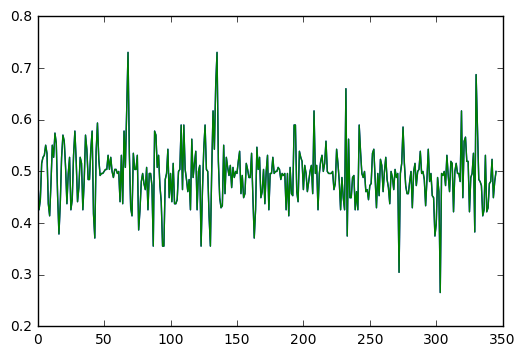

In [3]:
import matplotlib.pyplot as plt
plt.plot(data[8*8:410])
plt.show()

Testing input...

In [10]:
import IPython
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *

loader2 = SoundLoader(sound="inputs/sounds/3129775.wav",
                     fixed_size=410*3, 
                     sample_size=0.9, 
                     extract_length = 1,
                     one_hot = 256,
                     uLaw = 256,
                     samplerate=441,
                     random=True,
                     amplitude = 0.5
                     )
print("multiplier: "+str(loader2.multiplier))

init_batch = loader2.getNextBatch(1)
last_prediction = init_batch[0][0]
print(last_prediction[len(last_prediction)-1])
print(ConvNet.max_index(data=init_batch[1][0])/256)
converter = SoundConverter("")
data2 = converter.TensorToSound(last_prediction, "outputs/initial.wav", multiplier=1, offset=0, samplerate=441)


IPython.display.Audio("outputs/initial.wav")

multiplier: 1
0.5625
0.59375
Sound saved as: outputs/initial.wav


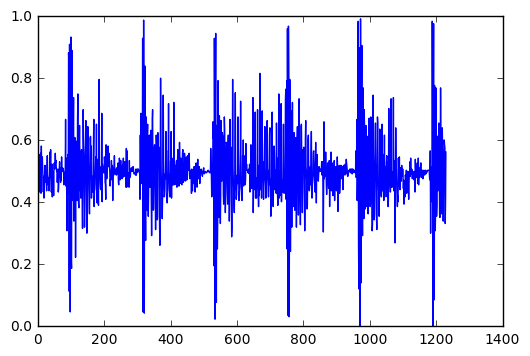

In [11]:
import matplotlib.pyplot as plt
plt.plot(last_prediction)
plt.show()

Testing per case prediction accuracy

In [1]:
#Test...

from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *

loader = SoundLoader(sound="inputs/sounds/3129775.wav",
                     fixed_size=8*8, 
                     sample_size=0.75, 
                     extract_length = 1,
                     one_hot = 256,
                     uLaw = 256,
                     samplerate=441,
                     #random=False,
                     insert_global_input_state = 4,
                     )

network = ConvNet(loader, n_steps=8)

x=tf.placeholder("float", [None, 8+loader.insert_global_input_state, 8])

#--------------------------------------------------------------------------------------------
#Layers
layers = []
layers.append(GRUOperation(cells=[256], n_classes=network.n_classes))
#End layers
#--------------------------------------------------------------------------------------------

start_point = 0
_tmp = loader.getNextTimeBatch(1, n_steps = 8)

print(_tmp)

prediction = network.Predict(_tmp[0][0], 
                              "graphs/AudioGenerationGraph", 
                              x = x,
                              layers = layers, 
                             )
print(prediction)
predicted_val = network.max_index(prediction[0])/network.loader.one_hot

real_val = network.max_index(_tmp[1][0])/network.loader.one_hot

print("real: "+str(real_val))
print("predicted: "+str(predicted_val))
print("error: "+str(abs(predicted_val-real_val)))

[[[[0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875], [0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875], [0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875], [0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875, 0.19921875], [0.52734375, 0.49609375, 0.5078125, 0.54296875, 0.51171875, 0.46875, 0.61328125, 0.5546875], [0.6640625, 0.59765625, 0.48828125, 0.47265625, 0.4765625, 0.38671875, 0.46875, 0.625], [0.41015625, 0.48046875, 0.5703125, 0.3671875, 0.54296875, 0.40625, 0.5390625, 0.5], [0.46875, 0.5, 0.5390625, 0.52734375, 0.44921875, 0.56640625, 0.60546875, 0.4921875], [0.39453125, 0.4375, 0.60546875, 0.5390625, 0.50390625, 0.55078125, 0.484375, 0.46875], [0.40625, 0.53125, 0.44921875, 0.515625, 0.421875, 0.59375, 0.51171875, 0.51953125], [0.51171875, 0.5546875, 0.5234375, 0.54296875, 0.46484375, 0.50390625, 0.4296875

Train and generate test:

In [1]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *
import IPython

loader = SoundLoader(sound="inputs/sounds/3129775.wav",
                     fixed_size=32*32, 
                     sample_size=0.9, 
                     insert_global_input_state = 4,
                     one_hot = 64,
                     uLaw = 64,
                     samplerate=4410,
                     amplitude = 0.5,
                     #random = False
                     )

print(loader.fixed_size)

network = ConvNet(loader, 
                  training_iters=100000, 
                  display_step=30, 
                  save_step = 30000,
                  learning_rate = 0.001, 
                  batch_size=128,
                  n_steps = 32,
                 )

print(network.n_input)
print(network.n_classes)

x=tf.placeholder("float", [None, 32+loader.insert_global_input_state, 32])
#x=tf.placeholder("float", [None, 32*32])

layers = []
"""
layers.append(NNOperation("reshape", [-1, 32+loader.insert_global_input_state, 32, 1]))
layers.append(NNOperation("conv2d", [2, 2, 1, 32]))
layers.append(NNOperation("reshape", [-1, (32+loader.insert_global_input_state)*32, 32]))
"""
layers.append(GRUOperation(cells=[256], n_classes=network.n_classes))

prediction = network.TrainAndGenerate(layers, 
                                      x=x, 
                                      save_path="graphs/AudioGenerationGraph",
                                      iterations=4410, 
                                      use_sample_state=True,
                                      sample_state_offset=0,
                                      display_step = 100,
                                      sample_length = 30,
                                      epsilon = 0,
                                     )

1025
32
64
x: (?, 36, 32)
y: (?, 64)
GRU_0: [256] => (?, 64)


C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Iter 3840, Minibatch Loss= 3.099371, Training Accuracy= 0.14844
Iter 7680, Minibatch Loss= 3.189664, Training Accuracy= 0.07031
Iter 11520, Minibatch Loss= 3.087853, Training Accuracy= 0.14062
Iter 15360, Minibatch Loss= 3.138031, Training Accuracy= 0.11719
Iter 19200, Minibatch Loss= 3.164102, Training Accuracy= 0.07812
Iter 23040, Minibatch Loss= 2.941439, Training Accuracy= 0.12500
Iter 26880, Minibatch Loss= 3.069222, Training Accuracy= 0.10938
Iter 30720, Minibatch Loss= 3.173295, Training Accuracy= 0.10156
Iter 34560, Minibatch Loss= 3.145296, Training Accuracy= 0.10938
Iter 38400, Minibatch Loss= 2.993501, Training Accuracy= 0.14062
Iter 42240, Minibatch Loss= 3.108211, Training Accuracy= 0.16406
Iter 46080, Minibatch Loss= 3.057311, Training Accuracy= 0.12500
Iter 49920, Minibatch Loss= 2.973669, Training Accuracy= 0.18750
Iter 53760, Minibatch Loss= 2.965656, Training Accuracy= 0.19531
Iter 57600, Minibatch Loss= 3.093408, Training Accuracy= 0.14844
Iter 61440, Minibatch Loss=

In [2]:
from helpers.extractor import *
from helpers.sound_tools import *
from helpers.neural_network import *
converter = SoundConverter("")
data = converter.TensorToSound(prediction, "outputs/generated.wav", multiplier=1, offset=0, samplerate=4410)

import IPython
IPython.display.Audio("outputs/generated.wav")

Sound saved as: outputs/generated.wav


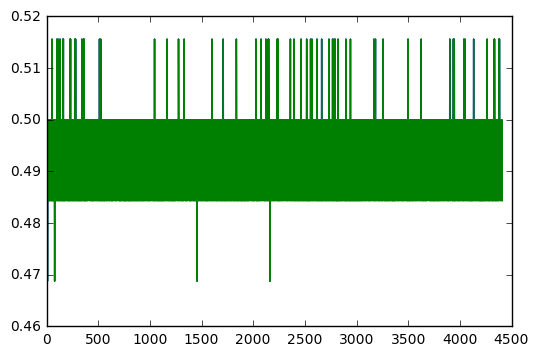

In [3]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()